epsilon in left media is  1.5
epsilon in slab is  2.0
new epsilon in slab is  2.07612456747
epsilon in right media is  2.87352881311
lamda =  80
width of the slab is  17
finished


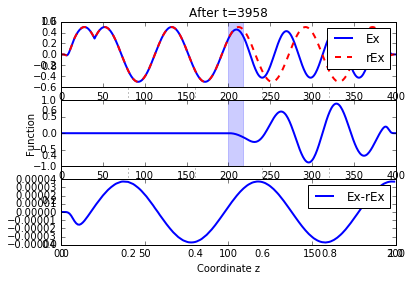

In [3]:
%matplotlib inline 

import numpy as np
import math as math
import matplotlib.pyplot as plt
from matplotlib import patches


n = 400 #number of points
epsilon_1 = 1.5 #eps of the media
epsilon_2 = 2.0 #eps of the slab
epsilon = max(epsilon_1,epsilon_2)

lamda = n//5
tau = 3*lamda*np.sqrt(epsilon)
t0 = 10.0*tau #delay of the source
tot_time = int(n*np.sqrt(epsilon)+t0)
source_point = n//10
v = 1/np.sqrt(epsilon_1) #light velosity in the left media

print("epsilon in left media is ",epsilon_1)
print("epsilon in slab is ",epsilon_2)
n_1 = np.sqrt(epsilon_1)
n_2 = np.sqrt(epsilon_2)

#X = lamda*n_1/n_2/2
X = lamda*n_1/n_2/4

l = int(X)
epsilon_2 = (X*n_2/l)**2 #corrected eps of the slab

#epsilon_3 = epsilon_1 #half-slab (n_3 = n_1)
epsilon_3=(epsilon_2/n_1)**2 #quater-slab (n_1*n_3 = n_2**2)

print("new epsilon in slab is ",epsilon_2)
print("epsilon in right media is ",epsilon_3)
print("lamda = ",lamda)
print("width of the slab is ",l)

eps = np.ones(n)
reps = np.ones(n)
eps[:n//2] = epsilon_1
eps[n//2:n//2 + l] = epsilon_2
eps[n//2+l:] = epsilon_3
reps[:] = epsilon_1
  
ex=np.zeros(n)
hy=np.zeros(n)
rex=np.zeros(n)
rhy=np.zeros(n)
z=np.linspace(0,n-1,n)

#-------------PML-------------------
pml_width=20 #PML width
m = 4  
R0 = 10**(-6)
dx = 1
Smax = -(m+1)*np.log(R0)/2/(pml_width*dx)
ex = np.zeros(n)
rex = np.zeros(n)
hy = np.zeros(n)
rhy = np.zeros(n)
z=np.linspace(0,n-1,n)
Se = np.zeros(n)
Sm = np.zeros(n)
Pe = np.zeros(n)
Pm = np.zeros(n)
rPe = np.zeros(n)
rPm = np.zeros(n)

for nn in range(int(pml_width)):
    Se[nn+1] = Smax*((pml_width-nn-0.5)/pml_width)**m
    Sm[nn] = Smax*((pml_width-nn)/pml_width)**m
    Se[n-1-nn] = Smax*((pml_width-nn-0.5)/pml_width)**m  
    Sm[n-1-nn] = Smax*((pml_width-nn)/pml_width)**m
    
Ae = np.exp(-Se) - 1
Be = np.exp(-Se) 
Am = np.exp(-Sm) - 1
Bm = np.exp(-Sm) 
#-------------PML-------------------

def source(t, t0, tau):
    amp = np.exp(-(t-t0)**2/(2.0 * tau**2))   
    if t > t0:
        amp = 1.0
    return amp/np.sqrt(epsilon_1)*np.sin(2*np.pi*t*v/lamda)

def drawplot(z, ex, rex, q):
    s1 = patches.Rectangle((n//2, -100), l, 200.0, zorder=0, color='blue',alpha = 0.2)
    s2 = patches.Rectangle((n//2, -100), l, 200.0, zorder=0, color='blue',alpha = 0.2)
    fig = plt.figure()
    plt.title("After t=%i"%q)
    plt.grid(True)
    plt.xlabel(u'Coordinate z')
    plt.ylabel(u'Function')
    ax = fig.add_subplot(311)
    ax.plot(z, ex, '-', color='blue', linewidth=2, label=u'Ex')
    ax.plot(z, rex, '--', color='red', linewidth=2, label=u'rEx')
    plt.legend()
    ax.add_patch(s1)
    bx = fig.add_subplot(312)
    bx.plot(z, ex-rex, '-', color='blue', linewidth=2, label=u'Ex-rEx')
    cx = fig.add_subplot(313)
    cx.plot(z[:n//2],ex[:n//2]-rex[:n//2], '-', color='blue', linewidth=2, label=u'Ex-rEx')
    plt.legend()
    bx.add_patch(s2)
    plt.savefig("step6-at-time-%i.png"%q, fmt='png')
    plt.draw()

for q in range(tot_time):
    Pm[:-1] = Bm[:-1]*Pm[:-1] + Am[:-1]*(ex[1:] - ex[:-1])
    hy[:-1] += ex[1:] - ex[:-1] + Pm[:-1]
    rPm[:-1] = Bm[:-1]*rPm[:-1] + Am[:-1]*(rex[1:] - rex[:-1])
    rhy[:-1] += rex[1:] - rex[:-1] + rPm[:-1]
    
    Pe[1:] = Be[1:]*Pe[1:] + Ae[1:]*(hy[1:] - hy[:-1])
    ex[1:] += (hy[1:] - hy[:-1])/eps[:-1] + Pe[1:]/eps[:-1]        
    ex[source_point] += source(q,t0,tau)    
    rPe[1:] = Be[1:]*rPe[1:] + Ae[1:]*(rhy[1:] - rhy[:-1])
    rex[1:] += (rhy[1:] - rhy[:-1])/reps[:-1] + rPe[1:]/reps[:-1]        
    rex[source_point] += source(q,t0,tau)         
#    if q % int(n/35*np.sqrt(epsilon))==0 or q+5>tot_time:
drawplot(z, ex, rex, q)
print('finished')